In [1]:
import Pkg; 
Pkg.add(["AlgebraOfGraphics", "CairoMakie", "DataFrames", "Arrow", "MakiePublication"])

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [2]:
using AlgebraOfGraphics
using AlgebraOfGraphics: density
using CairoMakie
using DataFrames
using Arrow

set_aog_theme!()

In [3]:
function load(path :: String)
    df = path |> Arrow.Table |> DataFrame |> dropmissing

    # Iterate through each column in the DataFrame

    filter(row -> all(x -> !(x isa Number && isnan(x)), row), df)
end

begin
    path01 = "../data/psp_ids_dataset.arrow"
    path02 = "../data/psp_ids_dataset_r.arrow"
    path03 = "../data/wind_ids_dataset_r.arrow"

    psp_df = load(path01)
    psp_df_r = load(path02)
    wind_df=  load(path03)
end
# psp_df = Dataset("../data/psp_ids_dataset.parquet")

┌ Warning: automatically converting Arrow.Timestamp with precision = NANOSECOND to `Dates.DateTime` which only supports millisecond precision; conversion may be lossy; to avoid converting, pass `Arrow.Table(source; convert=false)
└ @ Arrow /Users/zijin/.julia/packages/Arrow/Y6R1E/src/eltypes.jl:273


Row,time,tstart,tstop,d_tstart,d_tstop,d_time,time_before,time_after,duration,count,B_std,B_mean,dB_vec,index_diff,index_std,index_fluctuation,B.after,B.before,b_mag,b_n,bn_over_b,d_star,db_mag,db_over_b,db_over_b_max,fit.stat.chisqr,fit.stat.rsquared,fit.vars.amplitude,fit.vars.c,fit.vars.sigma,rotation_angle,dB_x,dB_y,dB_z,dB_lmn_x,dB_lmn_y,dB_lmn_z,k_x,k_y,k_z,Vl_x,Vl_y,Vl_z,Vn_x,Vn_y,Vn_z,VX (GSM),VY (GSM),VZ (GSM),plasma_density,SW Vth,plasma_speed,plasma_temperature,n.before,T.before,v.ion.before,n.after,T.after,v.ion.after,v_l,v_n,v_k,v_mn,L_n,L_mn,L_k,j0,j0_k,ion_inertial_length,Alfven_speed,j_Alfven,L_n_norm,L_mn_norm,L_k_norm,j0_norm,j0_k_norm,v.Alfven.before,v.Alfven.after,n.change,v.ion.change,T.change,B.change,v.Alfven.change
,DateTime,DateTime,DateTime,DateTime,DateTime,DateTime,DateTime,DateTime,Nanoseco…,UInt32,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2019-04-09T00:04:00,2019-04-09T00:03:45,2019-04-09T00:04:15,2019-04-09T00:04:04.443,2019-04-09T00:04:10.975,2019-04-09T00:04:08.698,2019-04-09T00:03:02.175,2019-04-09T00:04:39.701,6532000000 nanoseconds,326,1.14027,5.18873,2.23883,0.431479,2.26035,1.32572,5.24779,5.21163,5.14389,-2.87895,-0.559683,1.40225,0.0361662,0.0070309,0.0421349,1.59956,0.986743,3.47302,-1.5191,0.619188,42.3425,1.84289,-2.06591,2.57028,-3.7749,0.0378329,-0.138808,-0.845749,-0.489105,0.213274,0.520521,-0.538262,0.662821,-0.792433,-0.0154468,0.609763,-408.13,-21.5688,3.77595,4.28721,29.3793,408.717,4.50549,3.84823,3.62629,414.582,4.28721,4.50549,408.717,-198.328,326.051,356.53,357.373,2129.77,2334.36,2328.85,3.12243,3.12982,109.985,54.1729,37.2107,19.3641,21.2243,21.1743,0.0839123,0.0841107,57.9323,55.2672,0.438974,-5.86519,0.879199,0.0361662,-2.66508
2,2019-04-09T00:04:15,2019-04-09T00:04:00,2019-04-09T00:04:30,2019-04-09T00:04:01.959,2019-04-09T00:04:29.743,2019-04-09T00:04:08.641,2019-04-09T00:03:02.175,2019-04-09T00:04:39.701,27784000000 nanoseconds,326,1.51717,5.17291,3.85022,0.744306,3.85822,1.85072,5.18052,5.17727,5.17064,-4.55401,-0.880745,1.35697,0.00324529,0.000627639,0.0562533,15.1384,0.975207,3.50537,-1.81881,0.645811,52.8034,1.28846,-2.60697,3.57157,-4.52987,0.832318,0.00843916,-0.931023,-0.357131,0.0751935,0.447713,-0.542256,0.710994,0.108923,0.822289,0.558549,-408.13,-21.5688,3.77595,4.28721,29.3793,408.717,4.50549,3.84823,3.62629,414.582,4.28721,4.50549,408.717,-168.344,60.0816,387.965,372.437,1669.31,10347.8,10779.2,2.89939,2.78334,109.985,54.4546,37.4041,15.1776,94.0836,98.0061,0.0775151,0.0744127,57.5504,54.5587,0.438974,-5.86519,0.879199,0.00324529,-2.99171
3,2019-04-09T00:05:15,2019-04-09T00:05:00,2019-04-09T00:05:30,2019-04-09T00:05:01.851,2019-04-09T00:05:22.183,2019-04-09T00:05:17.560,2019-04-09T00:04:39.701,2019-04-09T00:06:12.652,20332000000 nanoseconds,326,1.82274,5.19529,2.76919,0.533019,3.89969,2.2526,5.25227,5.20298,5.20315,-4.66775,-0.897101,-4.49424,0.0492907,0.00947325,0.0761775,24.7382,0.952952,-3.68393,1.67977,0.204925,52.5474,-0.593469,3.09272,-3.3918,4.62445,0.130232,0.137514,0.935625,0.326552,0.13405,0.102896,-0.693543,0.71303,-0.0832952,0.708309,0.700971,-408.13,-21.5688,3.77595,4.28721,29.3793,408.717,4.50549,4.28721,4.50549,408.717,4.91188,4.55579,407.034,-24.3436,21.3647,388.394,407.991,434.387,8295.28,7896.82,-8.76587,-9.20818,109.985,54.797,37.6393,3.94951,75.4218,71.799,-0.232891,-0.244643,54.7952,51.6775,0.624669,-1.68292,0.0503085,0.0492907,-3.11776
4,2019-04-09T00:05:30,2019-04-09T00:05:15,2019-04-09T00:05:45,20

In [4]:
function process!(df)
    df[!, "n.mean"] = (df[!, "n.before"] .+ df[!, "n.after"]) ./ 2
    df[!, "B.mean"] = (df[!, "B.before"] .+ df[!, "B.after"]) ./ 2
end 

begin
    # concat dataframe with add column dataset to identify the dataset
    psp_df[!, :dataset] .= "PSP (High Res)"
    psp_df_r[!, :dataset] .= "PSP (Low Res)"
    wind_df[!, :dataset] .= "Wind"

    process!(psp_df)
    process!(psp_df_r)
    process!(wind_df)

    df = vcat(psp_df, psp_df_r, wind_df, cols=:intersect)
end


Row,time,tstart,tstop,d_tstart,d_tstop,d_time,time_before,time_after,duration,count,B_std,B_mean,dB_vec,index_diff,index_std,index_fluctuation,B.after,B.before,b_mag,b_n,bn_over_b,d_star,db_mag,db_over_b,db_over_b_max,fit.stat.chisqr,fit.stat.rsquared,fit.vars.amplitude,fit.vars.c,fit.vars.sigma,rotation_angle,dB_x,dB_y,dB_z,dB_lmn_x,dB_lmn_y,dB_lmn_z,k_x,k_y,k_z,Vl_x,Vl_y,Vl_z,Vn_x,Vn_y,Vn_z,plasma_density,plasma_temperature,plasma_speed,n.before,T.before,v.ion.before,n.after,T.after,v.ion.after,v_l,v_n,v_k,v_mn,L_n,L_mn,L_k,j0,j0_k,ion_inertial_length,Alfven_speed,j_Alfven,L_n_norm,L_mn_norm,L_k_norm,j0_norm,j0_k_norm,v.Alfven.before,v.Alfven.after,n.change,v.ion.change,T.change,B.change,v.Alfven.change,dataset,n.mean,B.mean
,DateTime,DateTime,DateTime,DateTime,DateTime,DateTime,DateTime,DateTime,Nanoseco…,UInt32,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,String,Float64,Float64
1,2019-04-07T01:01:00,2019-04-07T01:00:55,2019-04-07T01:01:05,2019-04-07T01:01:01.170,2019-04-07T01:01:03.662,2019-04-07T01:01:02.665,2019-04-07T01:00:59.286,2019-04-07T01:01:06.276,2491734000 nanoseconds,1465,19.3439,87.7052,23.3581,0.266326,2.9619,1.3622,87.2397,87.8215,86.5705,68.1844,0.787616,53.5734,-0.581797,0.0067205,0.0619413,11846.2,0.95131,76.0898,-36.6114,0.355073,50.6685,-41.5215,-3.39855,62.2571,-73.362,-10.149,-11.2495,0.71872,0.477499,0.505406,-0.661265,-0.183651,0.727324,-0.0536487,0.978664,0.198338,11.3854,90.3239,487.32,11.3854,90.3239,487.32,9.95501,80.9768,458.625,-387.977,77.6822,269.623,294.881,193.563,734.764,671.829,144.575,158.118,67.4911,559.465,1020.55,2.86799,10.8868,9.95433,0.141664,0.154935,567.55,602.936,-1.43042,-28.6949,-9.34706,-0.581797,35.3862,PSP (High Res),10.6702,87.5306
2,2019-04-07T01:01:05,2019-04-07T01:01:00,2019-04-07T01:01:10,2019-04-07T01:01:01.170,2019-04-07T01:01:08.631,2019-04-07T01:01:02.556,2019-04-07T01:00:59.286,2019-04-07T01:01:13.267,7461519000 nanoseconds,1465,23.6785,86.9062,54.7959,0.630517,3.07341,1.19321,86.1652,87.8215,86.7996,78.6348,0.905935,57.1868,-1.65623,0.0190811,0.071505,59711.6,0.884308,59.7903,-35.6556,0.261381,53.5535,-41.6375,-5.72565,66.1795,-78.2556,-2.53095,-3.98102,0.726421,0.473602,0.49801,-0.547541,-0.128313,0.826883,-0.210741,0.977467,0.0121322,9.95501,80.9768,458.625,11.3854,90.3239,487.32,10.1579,87.5089,452.642,-294.679,138.672,275.968,351.427,1034.7,2622.18,2059.14,129.494,164.903,72.1773,599.894,956.812,14.3356,36.3298,28.5289,0.135339,0.172346,567.55,589.534,-1.22756,-34.6781,-2.81503,-1.65623,21.9842,PSP (High Res),10.7717,86.9934
3,2019-04-07T01:05:25,2019-04-07T01:05:20,2019-04-07T01:05:30,2019-04-07T01:05:26.830,2019-04-07T01:05:29.998,2019-04-07T01:05:27.402,2019-04-07T01:05:24.926,2019-04-07T01:05:31.916,3167438000 nanoseconds,1465,29.0608,85.5481,82.5427,0.964869,2.79239,2.26773,84.2205,85.8251,83.4011,-38.4211,-0.460678,55.6048,-1.60469,0.0192407,0.0523352,1027.6,0.997082,120.645,-80.2655,0.542422,63.7388,-22.5662,-80.3814,33.0481,-89.7511,-1.27129,2.38787,0.117161,0.349325,0.929648,-0.244963,-0.885098,0.395721,0.633732,0.162718,0.756245,32.9182,67.2577,385.314,32.9182,67.2577,385.314,102.391,46.9564,373.501,-101.745,185.589,25.5761,371.638,587.843,1177.14,81.0106,119.065,1730.09,39.692,316.98,1671.77,14.8101,29.6568,2.04098,0.0712206,1.03488,326.193,181.495,69.4729,-11.8121,-20.3013,-1.60469,-144.698,PSP (High Res),67.6546,85.0228
4,2019-04-07T01:05:30,2019-04-07T01:05:25,2019-04-07T01:05:35,2019-04-07T01:05:26.830,2019-04-07T01:05:31.172,2019-04-07T01:05:27.

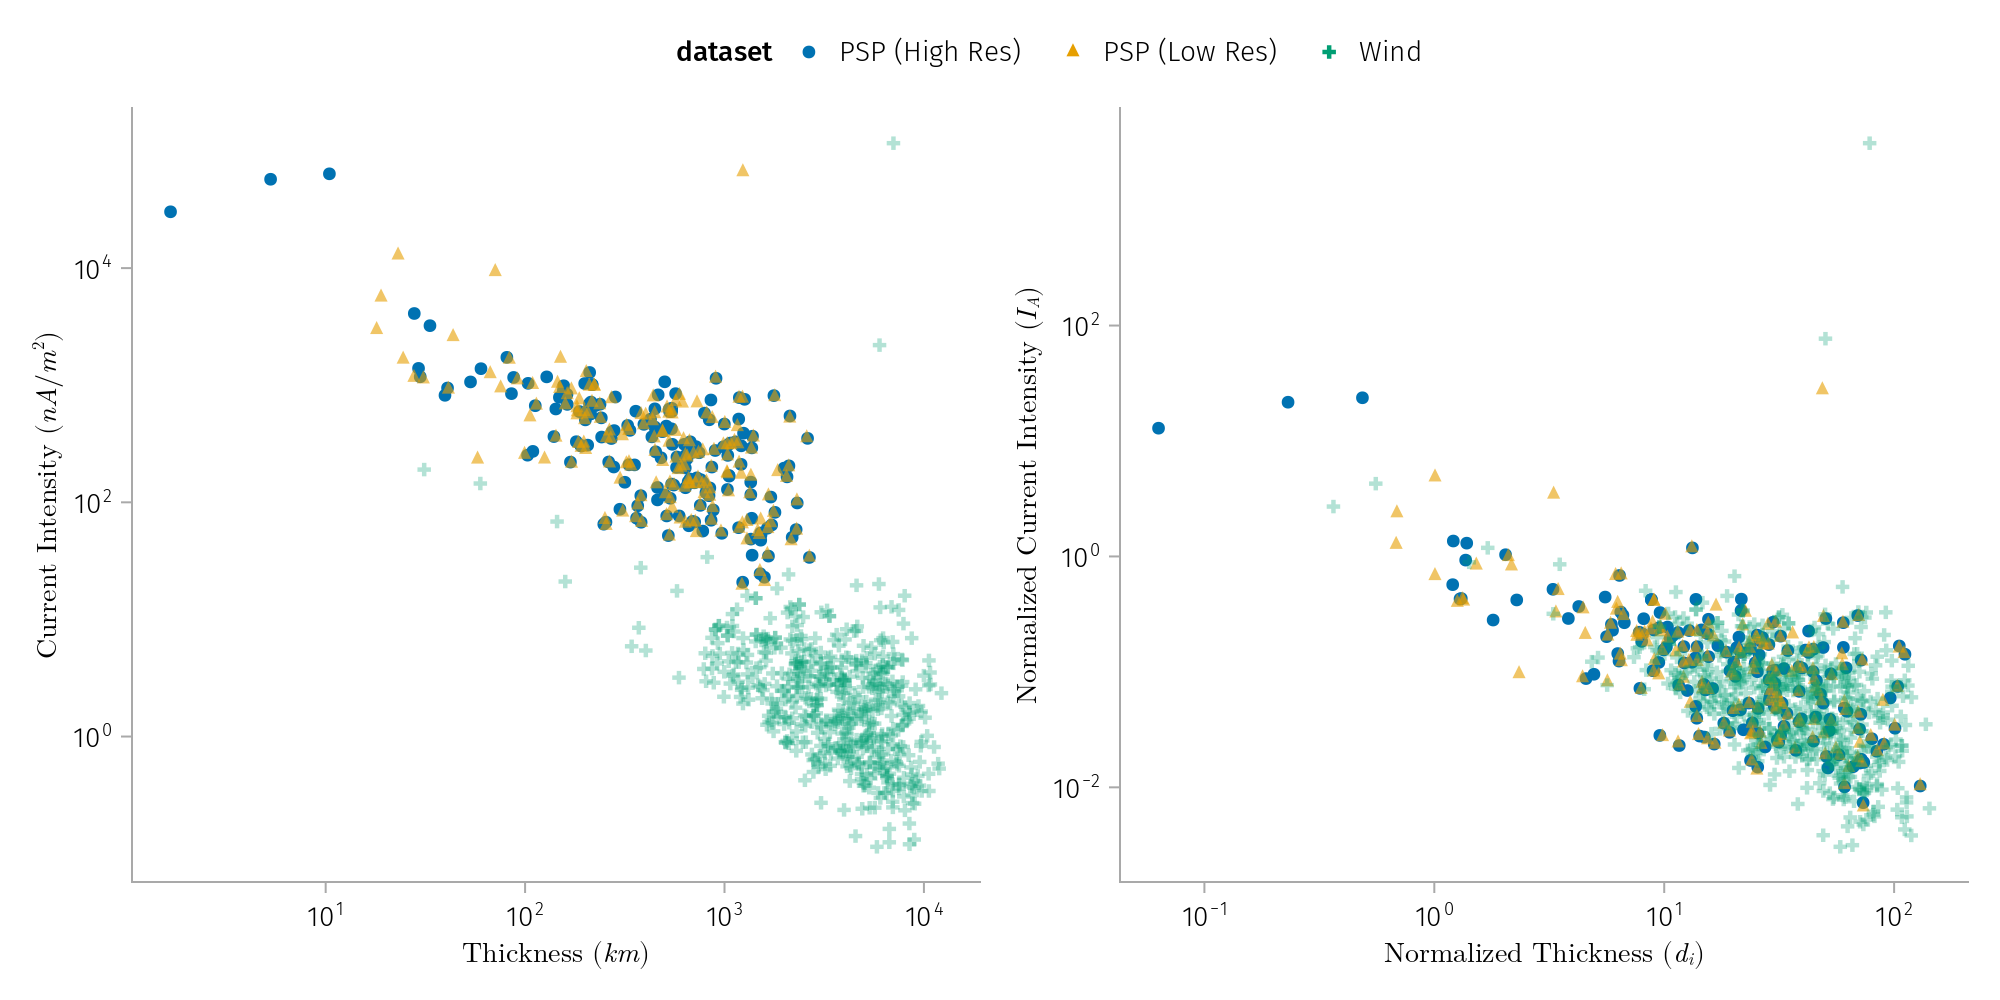

In [5]:
begin
    j_label = L"Current Intensity ($nA/m^2$)"
    j_norm_label = L"Normalized Current Intensity ($I_A$)"
    l_label = L"Thickness ($km$)"
    l_norm_label = L"Normalized Thickness ($d_i$)"

    thickness_map = (l -> abs(l)) => l_label
    thickness_norm_map = (l -> abs(l)) => l_norm_label
    current_map = (j -> abs(j)) => j_label
    current_norm_map = (j -> abs(j)) => j_norm_label

    data_layer_a = (data(psp_df) + data(psp_df_r) * visual(alpha=0.6) + data(wind_df) * visual(alpha=0.3)) * mapping(color=:dataset, marker=:dataset)
    plt = data_layer_a * visual(Scatter)

    fig = Figure(size = (1000, 500))

    axis = (yscale=log10, xscale=log10)
    grid = draw!(fig[2, 1], plt * mapping(:L_k => thickness_map, :j0_k => current_map), axis=axis)
    draw!(fig[2, 2], plt * mapping(:L_k_norm => thickness_norm_map, :j0_k_norm => current_norm_map), axis=axis)

    legend!(fig[1, 1:2], grid, titleposition=:left, orientation=:horizontal)

    # save("../figures/thickness_current.png", fig,  px_per_unit = 4)
    # save("../figures/thickness_current.pdf", fig)

    fig
end


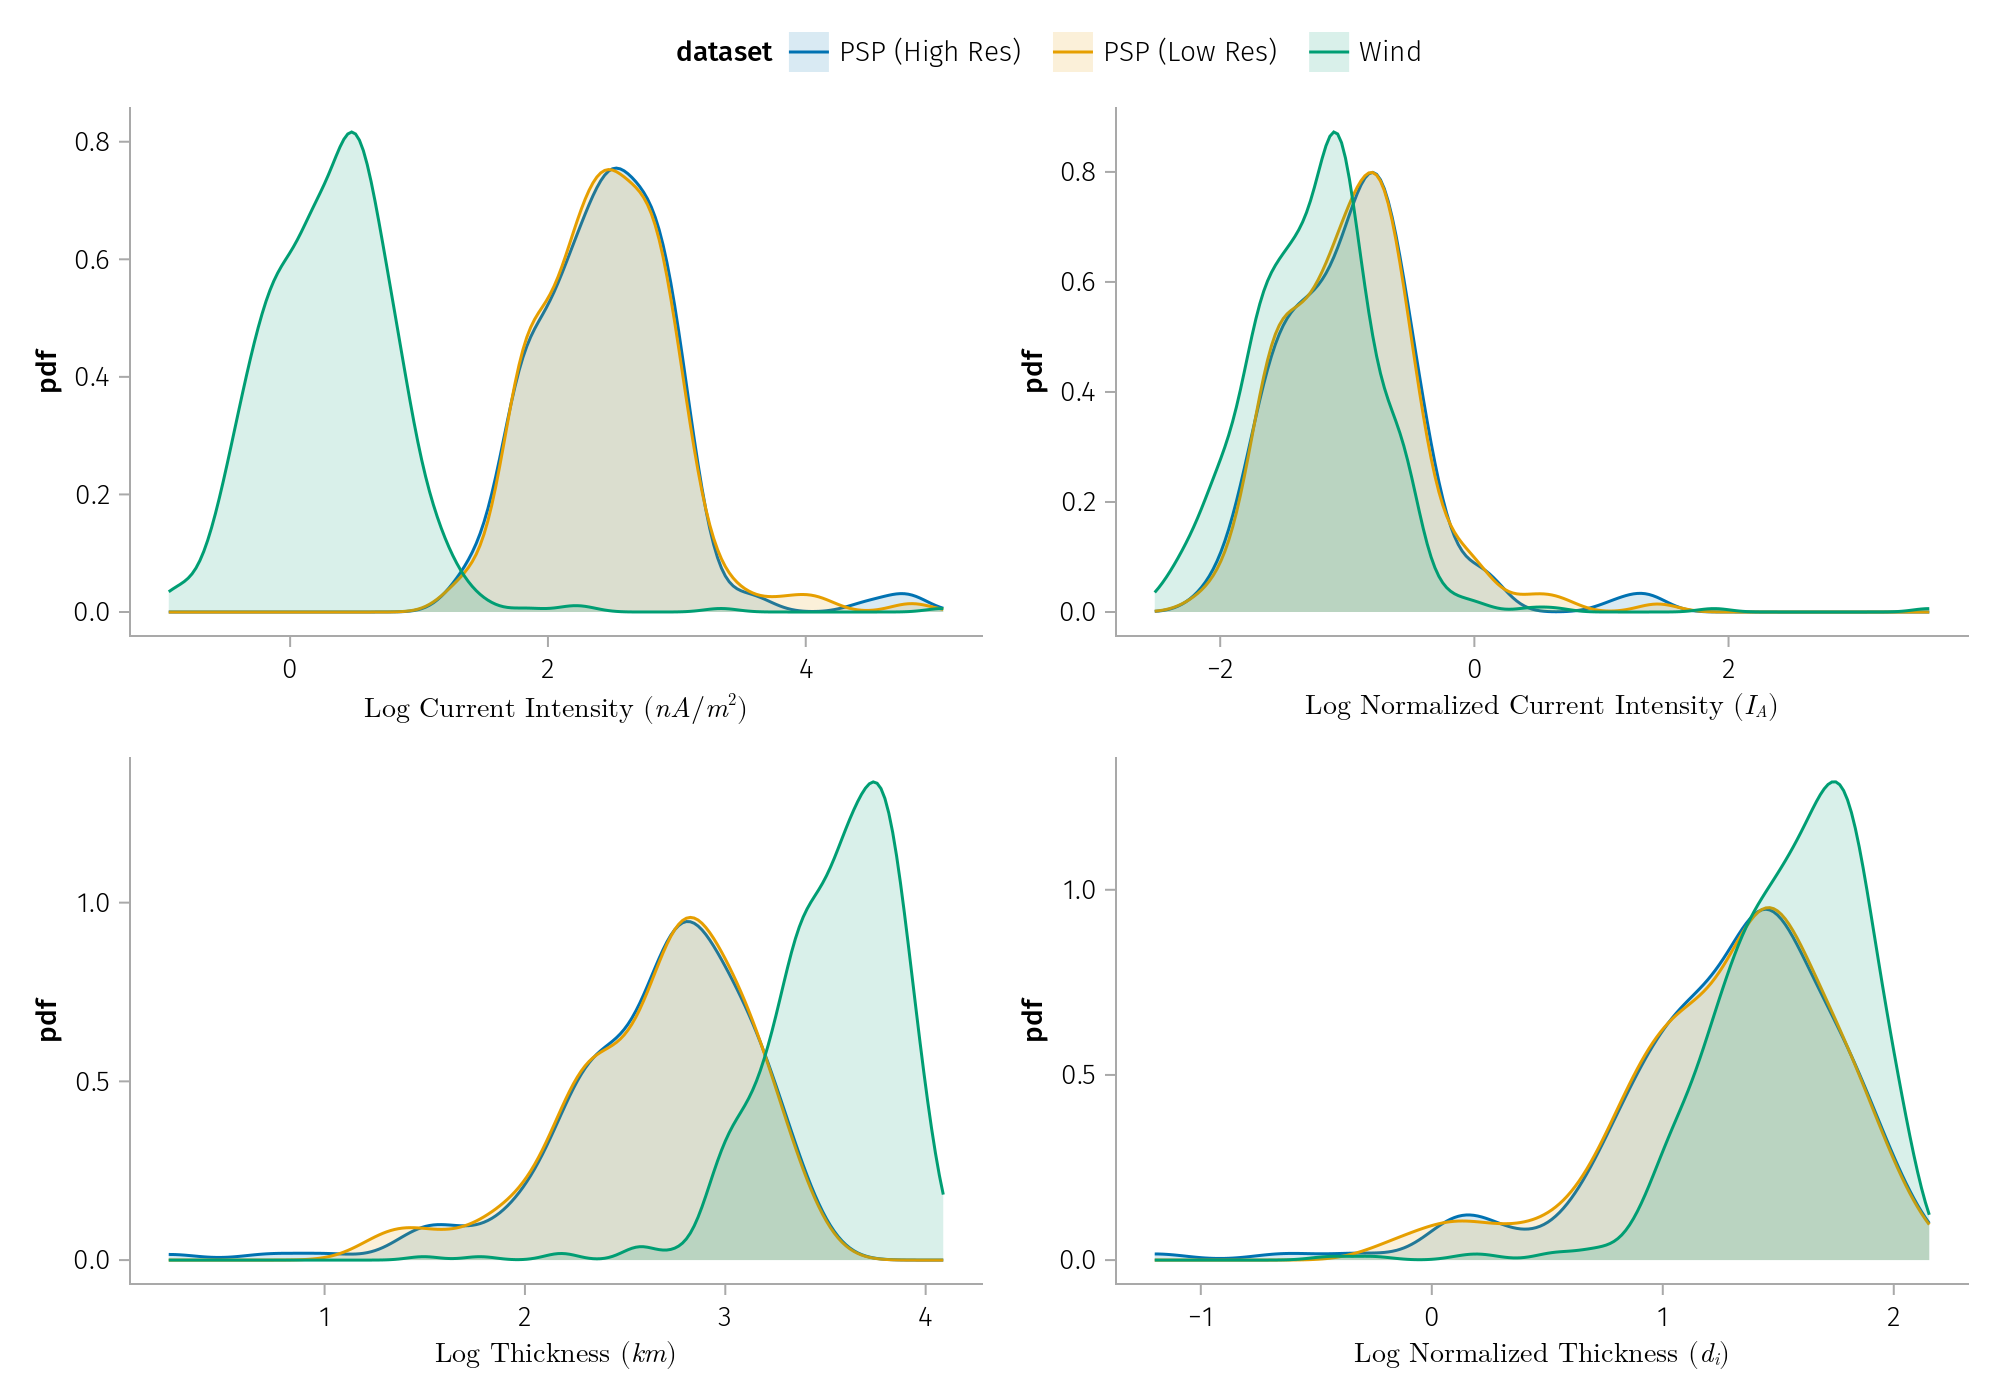

In [6]:
# plot the density distribution of the thickness and current density
begin

    data_layer = data(df) * mapping(color=:dataset, marker=:dataset) 
    plt = data_layer * density()

    fig = Figure(size = (1000, 700))
    mapping_layer_j = mapping(:j0_k => (j -> log10(abs(j))) => L"Log %$(j_label)")
    mapping_layer_j_norm = mapping(:j0_k_norm => (j -> log10(abs(j))) => L"Log %$(j_norm_label)")

    mapping_layer_l = mapping(:L_k => (l -> log10(abs(l))) => L"Log %$(l_label)")
    mapping_layer_l_norm = mapping(:L_k_norm => (l -> log10(abs(l))) => L"Log %$(l_norm_label)")

    grid = draw!(fig[2, 1], plt * mapping_layer_j)
    draw!(fig[2, 2], plt * mapping_layer_j_norm)
    draw!(fig[3, 1], plt * mapping_layer_l)
    draw!(fig[3, 2], plt * mapping_layer_l_norm)
    
    legend!(fig[1, 1:2], grid, titleposition=:left, orientation=:horizontal)
    # legend!(fig[1,3], grid,)

    save("../figures/density_distribution.pdf", fig)
    save("../figures/density_distribution.png", fig, px_per_unit = 4)
    fig

end

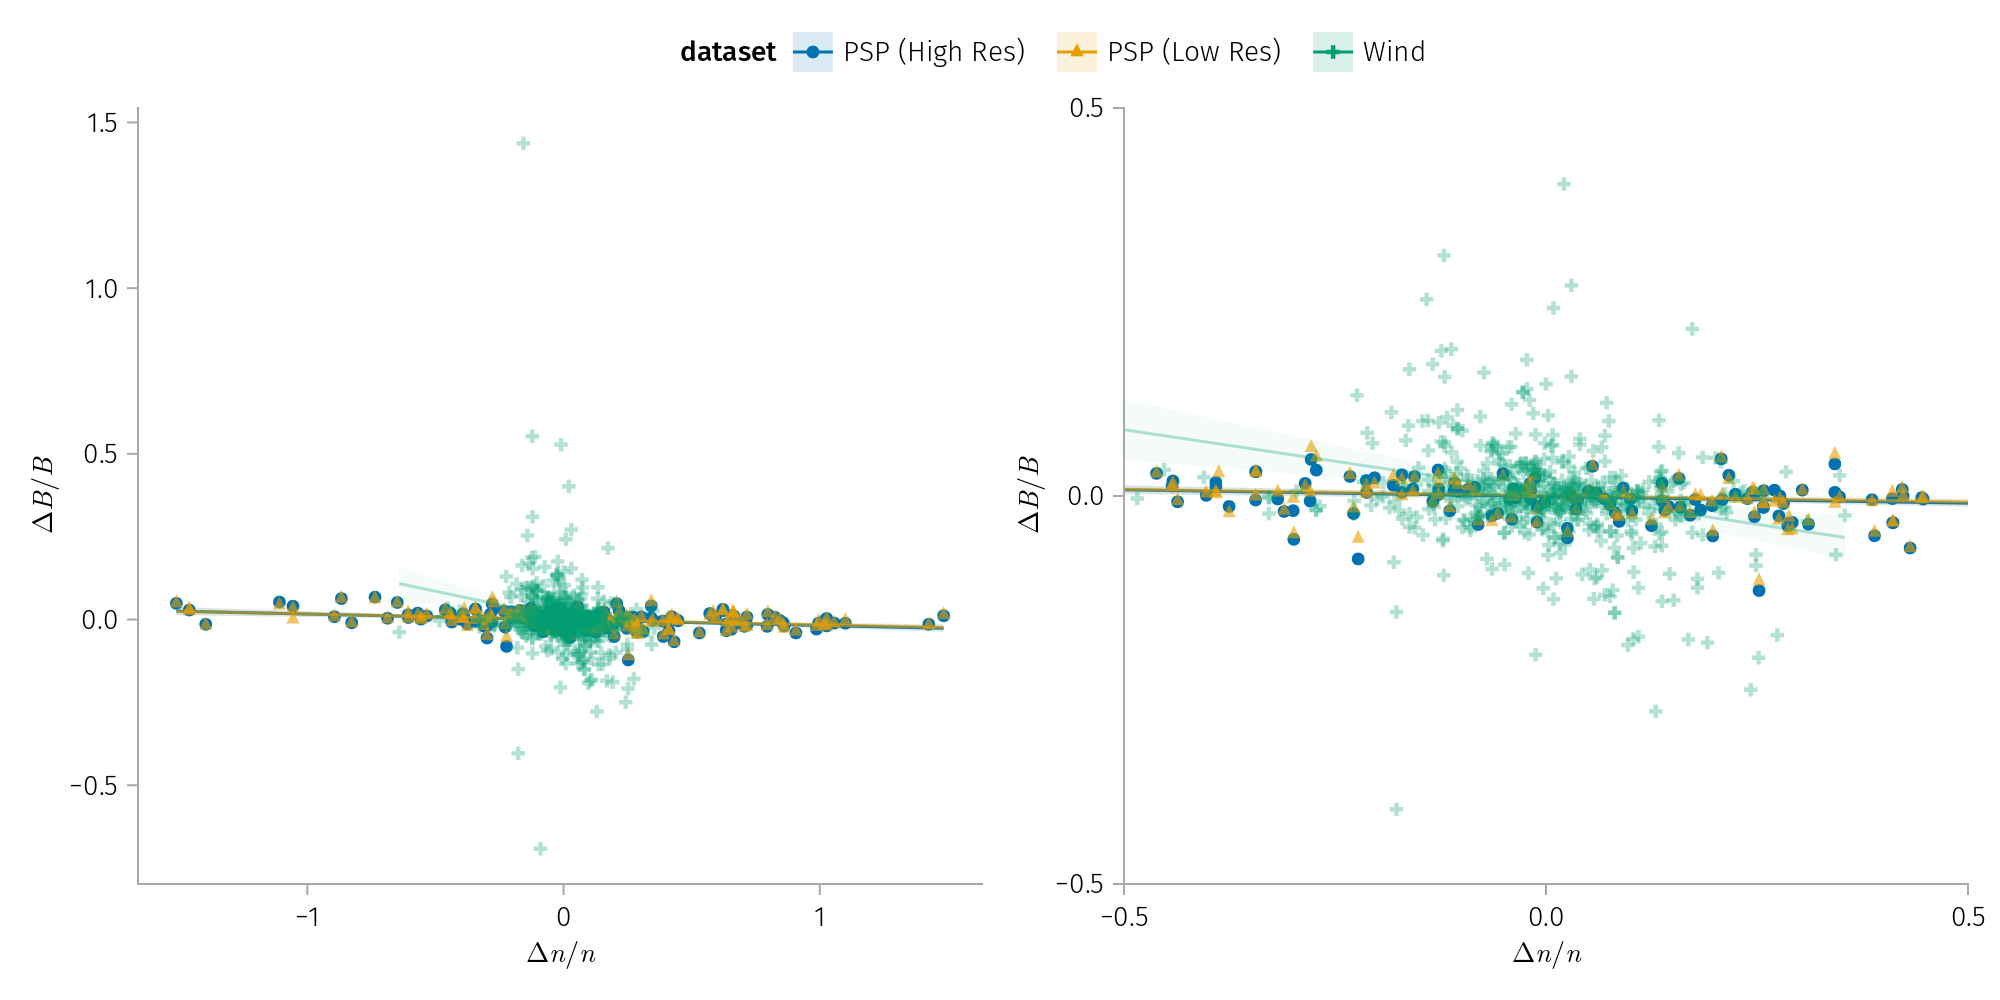

In [7]:
#| label: fig-dn-db
#| column: screen
begin
    # Create a density plot of the data

    dn_over_n = ("n.change", "n.mean") => (/) => L"\Delta n/n"
    db_over_b = ("B.change", "b_mag") => (/) => L"\Delta B/B"

    plt = data_layer_a * mapping(dn_over_n, db_over_b) * (linear() + mapping())


    fig = Figure(size = (1000, 500))
    grid = draw!(fig[2, 1], plt)
    draw!(fig[2, 2], plt, axis=(; limits=((-0.5,0.5), (-0.5, 0.5))))
    legend!(fig[1, 1:2], grid, titleposition=:left, orientation=:horizontal)

    fig

end

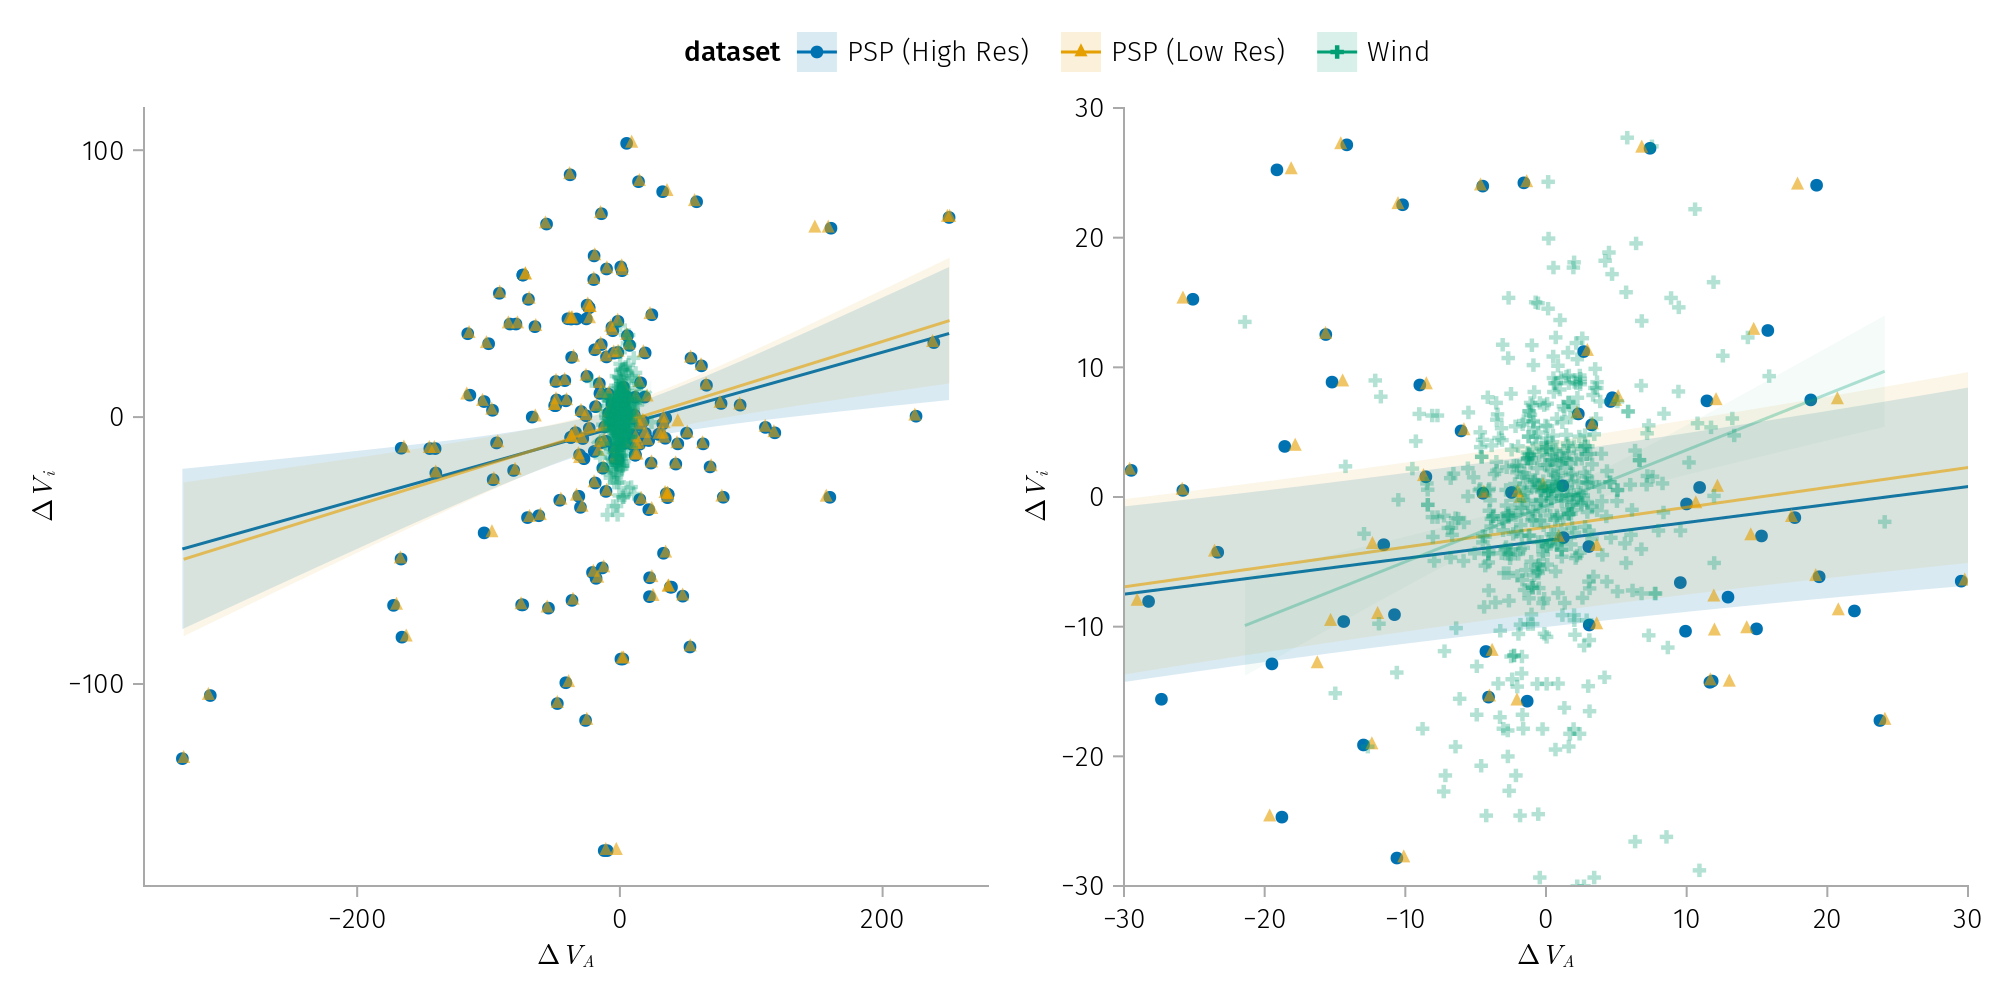

In [8]:
#| label: fig-dv
#| column: screen

plt = data_layer_a * mapping("v.Alfven.change" => L"Δ V_{A}", "v.ion.change" => L"\Delta V_{i}") * (linear() + mapping())

fig = Figure(size = (1000, 500))
grid = draw!(fig[2, 1], plt)
draw!(fig[2, 2], plt, axis=(; limits=((-30,30), (-30, 30))))
legend!(fig[1, 1:2], grid, titleposition=:left, orientation=:horizontal)

fig